# Classification

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix,classification_report
from sklearn.metrics import accuracy_score 
import seaborn as sns
from matplotlib.pylab import rcParams
from mlxtend.plotting import plot_decision_regions


iris_dataset = load_iris()

print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print("feature_names: {}".format(iris_dataset['feature_names']))
print("Target names: {}".format(iris_dataset['target_names']))


#Split dataset into 75% of trainig data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)

print("Training set")
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("Test set")
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Training set
X_train shape: (112, 4)
y_train shape: (112,)
Test set
X_test shape: (38, 4)
y_test shape: (38,)


##Training

In [42]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1).fit(X_train, y_train)
print("Done Training")

Done Training



**solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’** : The solver for weight optimization.
* ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
* ‘sgd’ refers to stochastic gradient descent.
* ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

**Activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’**: Activation function for the hidden layer.

## Prediction Accuracy

In [43]:
train_prediction = clf.predict(X_train)
print('The training set accuracy is:',metrics.accuracy_score(train_prediction,y_train))
test_prediction = clf.predict(X_test)
print('The testing set accuracy is:',metrics.accuracy_score(test_prediction,y_test))

The training set accuracy is: 1.0
The testing set accuracy is: 0.9736842105263158


## Report

In [44]:
print('Report')
print('\n',classification_report(y_test, test_prediction))

Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

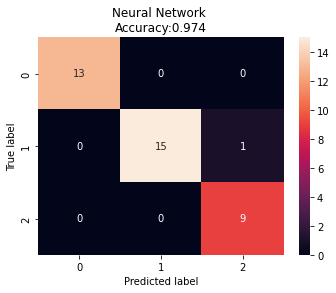

In [45]:
confusion_mc = confusion_matrix(y_test,test_prediction)

df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(5.5,4))

sns.heatmap(df_cm, annot=True)


plt.title('Neural Network \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, test_prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Decision Boundary

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


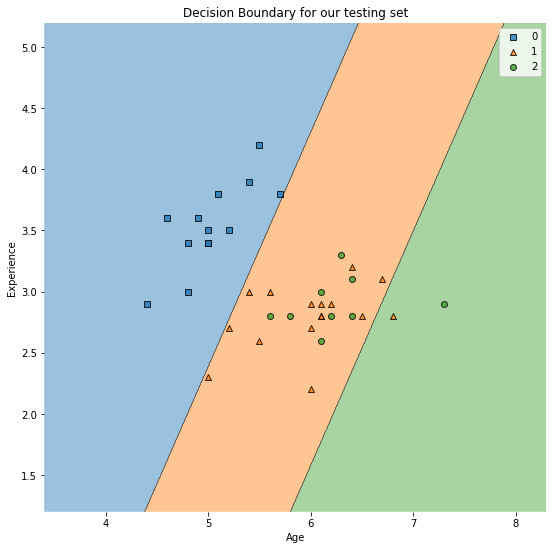

In [46]:
rcParams['figure.figsize'] = 9,9
plt.figure(3)   
y = np.array(y_test,dtype='int')
X= np.array(X_test)
X_test_reduce=np.append(np.array(X[:,0:1]),np.array(X[:,1:2]), axis=1)#Reduce our dataset to two dimensions.
clf=clf.fit(X_test_reduce, y)
plot_decision_regions(X=X_test_reduce, y=y_test,clf=clf, legend=2)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend(loc="best")
plt.title('Decision Boundary for our testing set')    
plt.show()